# EMD algorithm - Clustering experiments

## Maria Inês Silva
## 02/02/2019

***

## Data and library imports

In [111]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import dtw_clustering as clust
import uah_utils as utils
import clusterviz as cviz

import importlib
importlib.reload(clust)
importlib.reload(utils)
importlib.reload(cviz)

<module 'clusterviz' from '/Users/maria.silva/Documents/Tese/manueverMotifs/scripts/clusterviz.py'>

In [72]:
def transform_motif_dic_list_to_df(motif_dic_list):
    motif_df = pd.DataFrame(motif_dic_list)
    motif_df['n_members'] = motif_df['members_ts_pointers'].apply(lambda x: len(x))
    motif_df['pattern_len'] = motif_df['pattern'].apply(lambda x: len(x))
    motif_df = motif_df[['pattern', 'pattern_len', 'n_members', 'mdl_cost', 'mean_dist',  'n_brakes', 'n_turns', 'n_accelerations', 'dispersion', 'event_label']]
    return motif_df

In [2]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-uah'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))

In [3]:
trip_df = pd.read_pickle(os.path.join(data_folder, 'trip_df.pkl'))
ts = trip_df['ay'].values
events_ts = trip_df['event_type'].values
motif_dic_list = pickle.load(open(os.path.join(output_folder, 'motif_lat_acc_trip_exp1.p'), 'rb'))
center_dist_mat = np.load(os.path.join(output_folder, 'dist_lat_acc_trip_exp1.npy'))

## Clustering of motif's centers 

In [92]:
motif_dic_list[0].keys()

dict_keys(['pattern', 'mdl_cost', 'mean_dist', 'members_ts_pointers', 'center_ts_pointers', 'n_brakes', 'n_turns', 'n_accelerations', 'dispersion', 'event_label'])

In [4]:
len(motif_dic_list)

2786

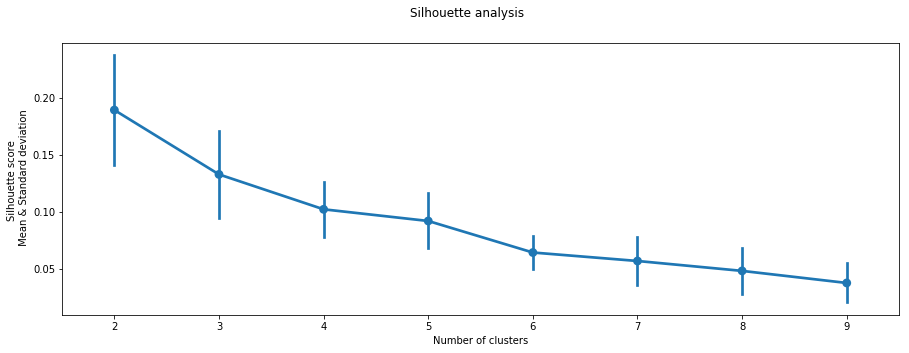

In [6]:
k_list = list(range(2, 10))
n_runs = 20
kmedoids_scores_df = clust.run_kmedoids_evaluation(center_dist_mat, k_list, n_runs)

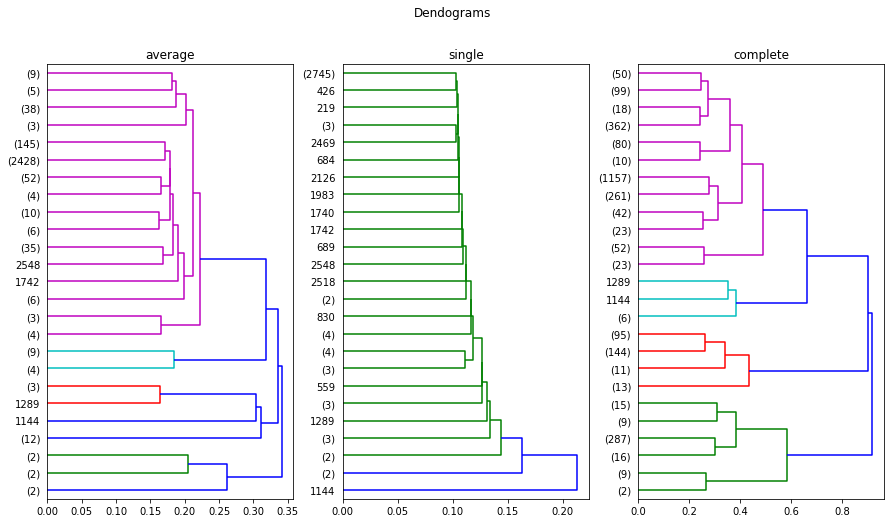

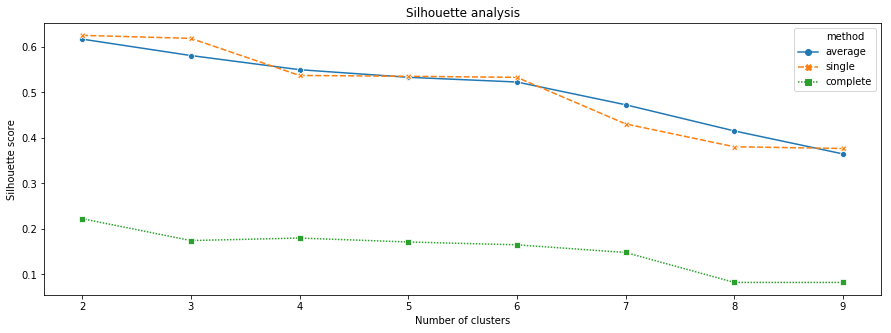

In [7]:
agglomerative_scores_df = clust.run_agglomerative_evaluation(center_dist_mat, k_list)

In [8]:
cluster_labels, score = clust.fit_agglomerative_model(center_dist_mat, k=6, method='complete')

In [73]:
motif_event_dic_list = utils.add_event_partition_to_motif(motif_dic_list, events_ts)
motif_df = transform_motif_dic_list_to_df(motif_event_dic_list).assign(cluster_label=cluster_labels)
motif_df.head()

,pattern,pattern_len,n_members,mdl_cost,mean_dist,n_brakes,n_turns,n_accelerations,dispersion,event_label,cluster_label
0,[bce],1,53,66255.68,0.10,2,2,3,0.20,3,6
1,[aed],1,8,86286.77,0.11,0,1,1,0.71,2,3
2,[ebb],1,142,52720.38,0.10,6,6,4,0.18,1,6
3,[dea],1,7,93337.80,0.07,0,1,0,1.41,2,6
4,[ccc],1,195,50814.52,0.10,2,5,9,0.54,3,3


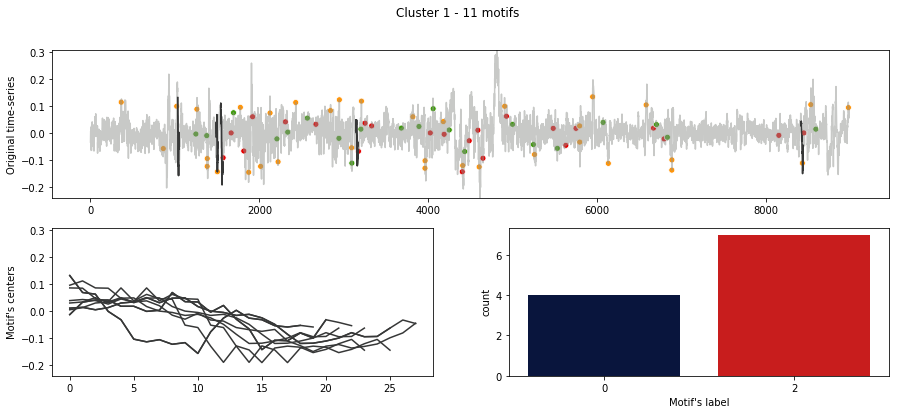

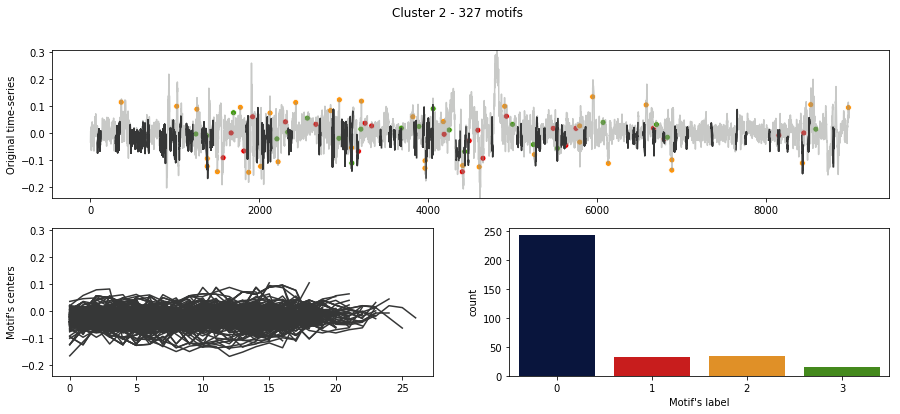

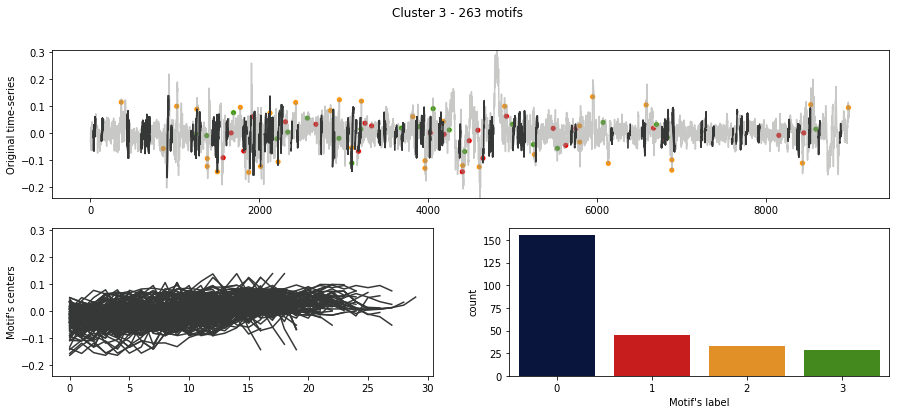

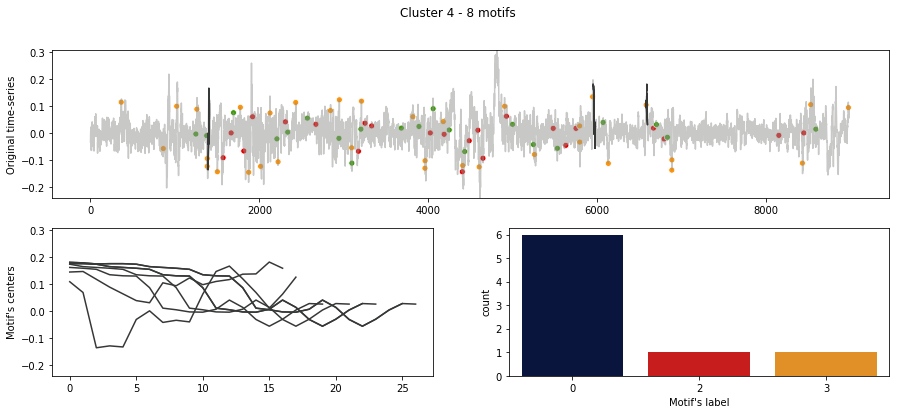

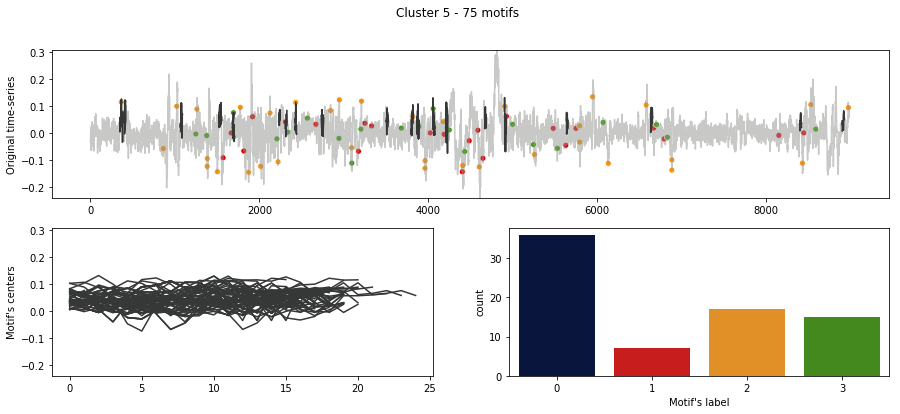

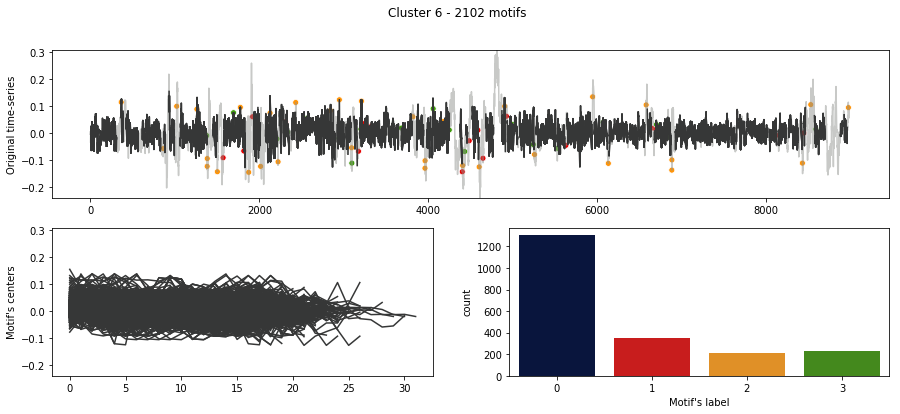

In [116]:
importlib.reload(cviz)
cviz.plot_motif_clusters(ts, events_ts, motif_event_dic_list, cluster_labels)

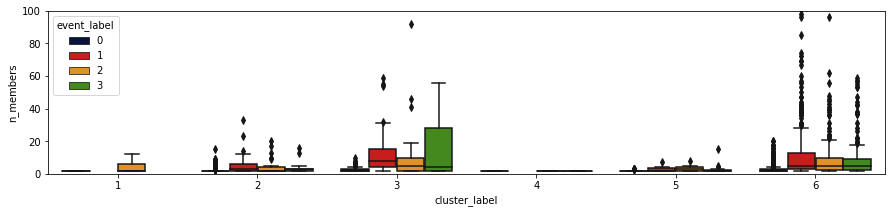

In [119]:
plt.figure(figsize=(15,3))
sns.boxplot(x="cluster_label", y="n_members", hue="event_label", data=motif_df,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.ylim(0, 100)
plt.show()

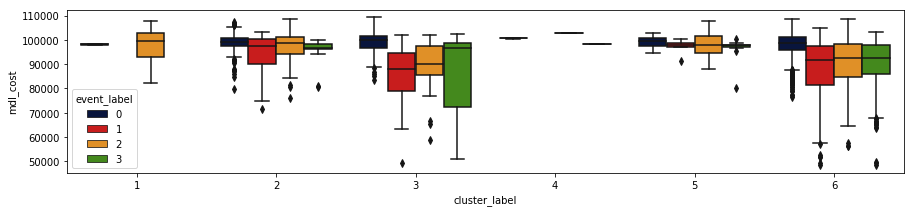

In [120]:
plt.figure(figsize=(15,3))
sns.boxplot(x="cluster_label", y="mdl_cost", hue="event_label", data=motif_df,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()

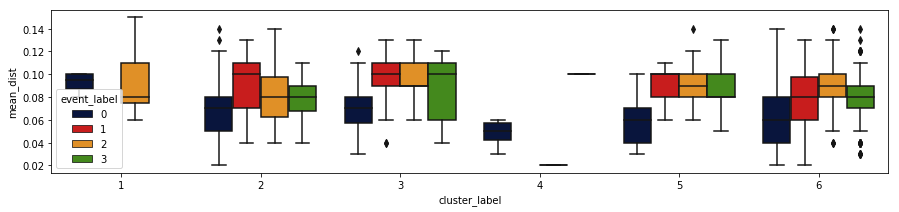

In [121]:
plt.figure(figsize=(15,3))
sns.boxplot(x="cluster_label", y="mean_dist", hue="event_label", data=motif_df,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()

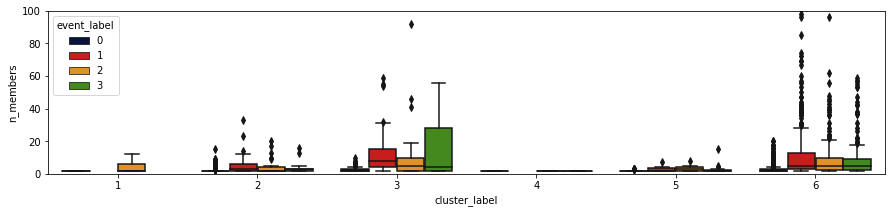

In [122]:
plt.figure(figsize=(15,3))
sns.boxplot(x="cluster_label", y="n_members", hue="event_label", data=motif_df,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.ylim(0, 100)
plt.show()

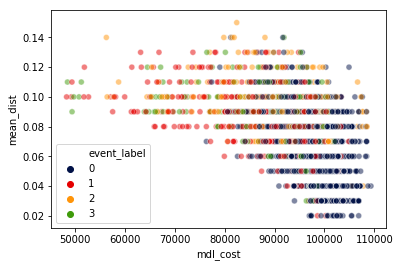

In [123]:
sns.scatterplot(x='mdl_cost', y='mean_dist', hue='event_label', data=motif_df, alpha=0.5,
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()

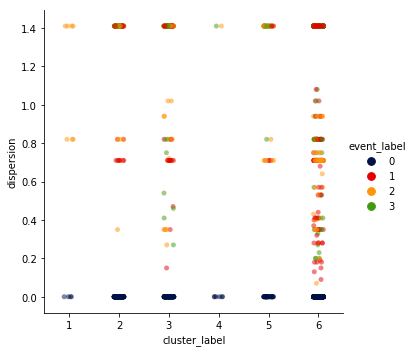

In [118]:
sns.catplot(x='cluster_label', y='dispersion', hue='event_label', data=motif_df, alpha=0.5, kind="strip",
                palette=sns.xkcd_palette(['navy blue', 'red', 'tangerine', 'grass green']))
plt.show()